In [1]:
import pandas as pd

df = pd.read_excel("finaldf_partner_imp_1k.xlsx", index_col=False)
df.drop(columns=["Column1","index_x", "index_y","symbol", "calendarYear", "revenue_to_Revenue_ratio", "marketCap"], axis = 1, inplace = True)
df.head(3)

,Label,Partner,totalCurrentAssets_to_totalAssets_ratio,totalNonCurrentAssets_to_totalAssets_ratio,totalCurrentLiabilities_to_totalLiabilities_ratio,totalNonCurrentLiabilities_to_totalLiabilities_ratio,costOfRevenue_to_Revenue_ratio,grossProfit_to_Revenue_ratio,operatingExpenses_to_Revenue_ratio,ebitda_to_Revenue_ratio,...,investmentsInPropertyPlantAndEquipment_to_Revenue_ratio,commonStockIssued_to_Revenue_ratio,debtRepayment_to_Revenue_ratio,debtToEquity,debtToAssets,daysOfInventoryOnHand,workingCapital_to_revenue_Ratio,employee_revenue_ratio,Number of Product Segments,Number of Geo Segments
0,2,263.0,52.543267,47.456733,65.918286,34.081714,72.963421,27.036579,19.487096,7.270342,...,-2030.050116,0.669815,-1346.597918,0.469952,0.149550,80.392441,16.931293,0.000226,3,3
1,2,263.0,50.142358,49.857642,62.165864,37.834136,74.850994,25.149006,19.476318,15.567115,...,-1607.798758,2.513364,-993.654078,0.680004,0.202260,92.362922,15.423757,0.000234,3,3
2,2,263.0,47.520648,52.479352,68.611247,31.388753,75.073354,24.926646,17.734589,13.704331,...,-294.934587,166.070145,164.719169,0.720136,0.225146,96.741438,7.261509,0.000242,3,3


In [2]:
columns_to_scale = [ "totalCurrentAssets_to_totalAssets_ratio", "totalNonCurrentAssets_to_totalAssets_ratio", "totalCurrentLiabilities_to_totalLiabilities_ratio",
                    "totalNonCurrentLiabilities_to_totalLiabilities_ratio", "costOfRevenue_to_Revenue_ratio",
                    "grossProfit_to_Revenue_ratio", "operatingExpenses_to_Revenue_ratio", "ebitda_to_Revenue_ratio", 
                     "investmentsInPropertyPlantAndEquipment_to_Revenue_ratio",
                    "commonStockIssued_to_Revenue_ratio","debtRepayment_to_Revenue_ratio", "debtToEquity", 
                    "debtToAssets", "workingCapital_to_revenue_Ratio", "employee_revenue_ratio"]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pylab as plt
import numpy as np

# Define the thresholds
threshold_min = -2000
threshold_max = 2000

# Filter rows where all specified columns are within the threshold
filtered_df = df[(df[columns_to_scale] >= threshold_min).all(axis=1) & (df[columns_to_scale] <= threshold_max).all(axis=1)]

# Separate explanatory (X) and target (y) variables
X = filtered_df.copy()
y = X.pop("Label")

# Feature selection
selector = SelectKBest(f_classif, k=15)  # Adjust k as needed
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Create a DataFrame with the selected features
X_new_df = pd.DataFrame(X_new, columns=selected_features)

# Create a DataFrame with the selected features
X_new_df = pd.DataFrame(X_new, columns=selected_features)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new_df)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)


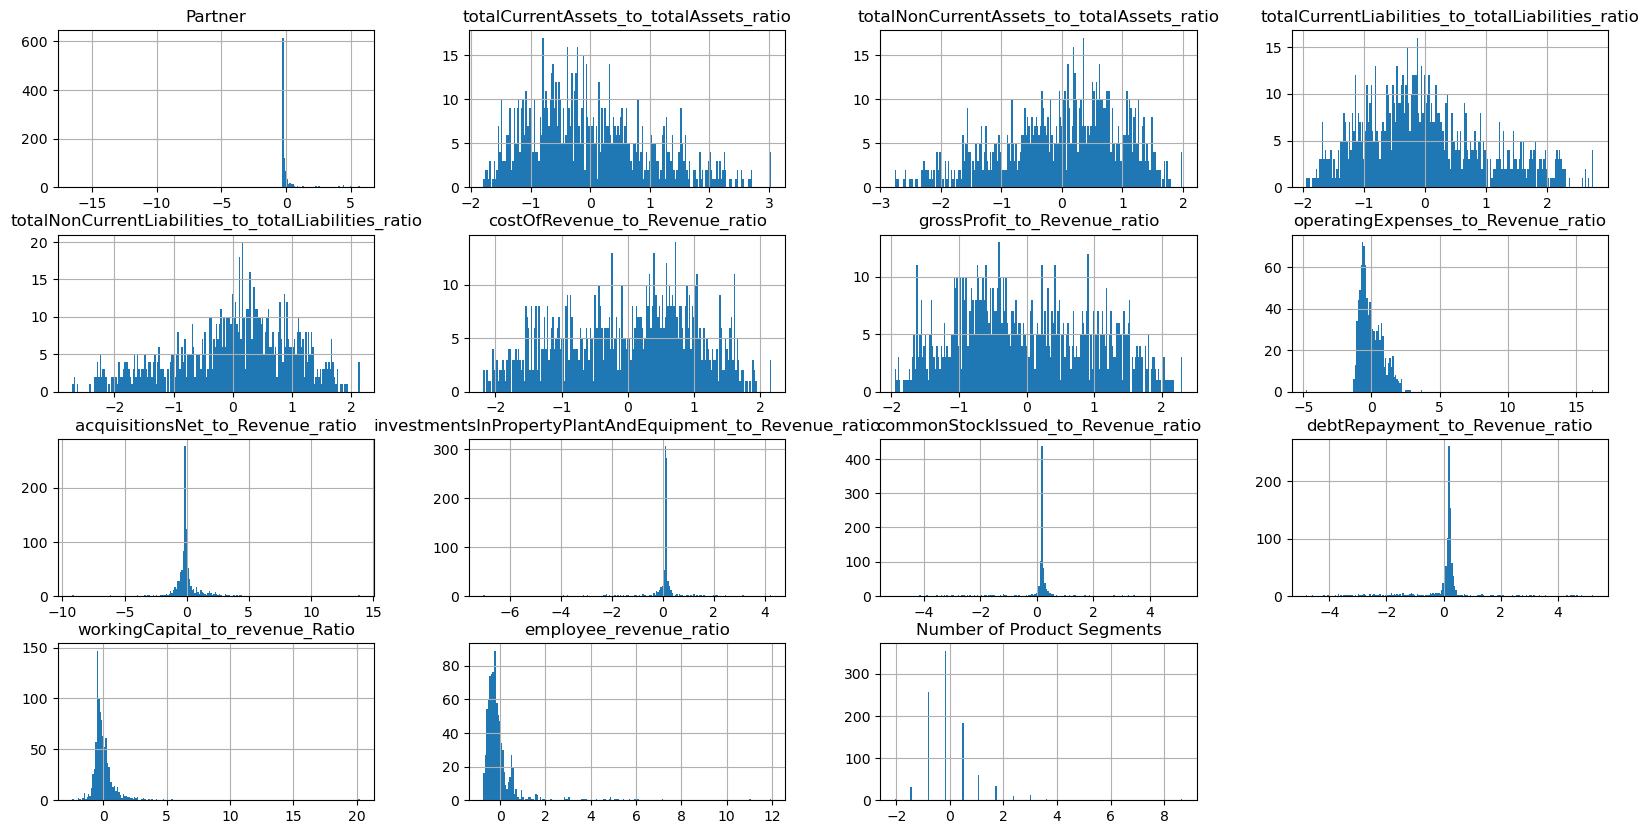

In [23]:
plt.rcParams["figure.figsize"] = (20,10)
X_scaled_df.select_dtypes(exclude="bool").hist(bins=200)
plt.show()

## Softmax Regression 

In [45]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, test_size=0.3, random_state=42)

# Create a logistic regression model with softmax (multinomial) option
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=200)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ver

Cross-validation scores: [0.63350785 0.67539267 0.70157068 0.65968586 0.62827225]
Mean cross-validation score: 0.6596858638743456
Test Accuracy: 0.6655052264808362
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.68      0.66        81
           2       0.66      0.66      0.66        74
           3       0.55      0.66      0.60        64
           4       0.90      0.66      0.76        68

    accuracy                           0.67       287
   macro avg       0.69      0.66      0.67       287
weighted avg       0.69      0.67      0.67       287



D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


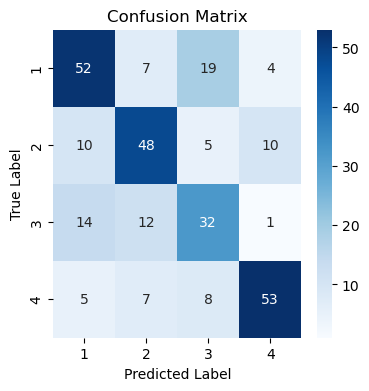

In [41]:
import seaborn as sns

matrix = confusion_matrix(y_pred, y_test)

plt.figure(figsize=(4,4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4], yticklabels=[1,2,3,4])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

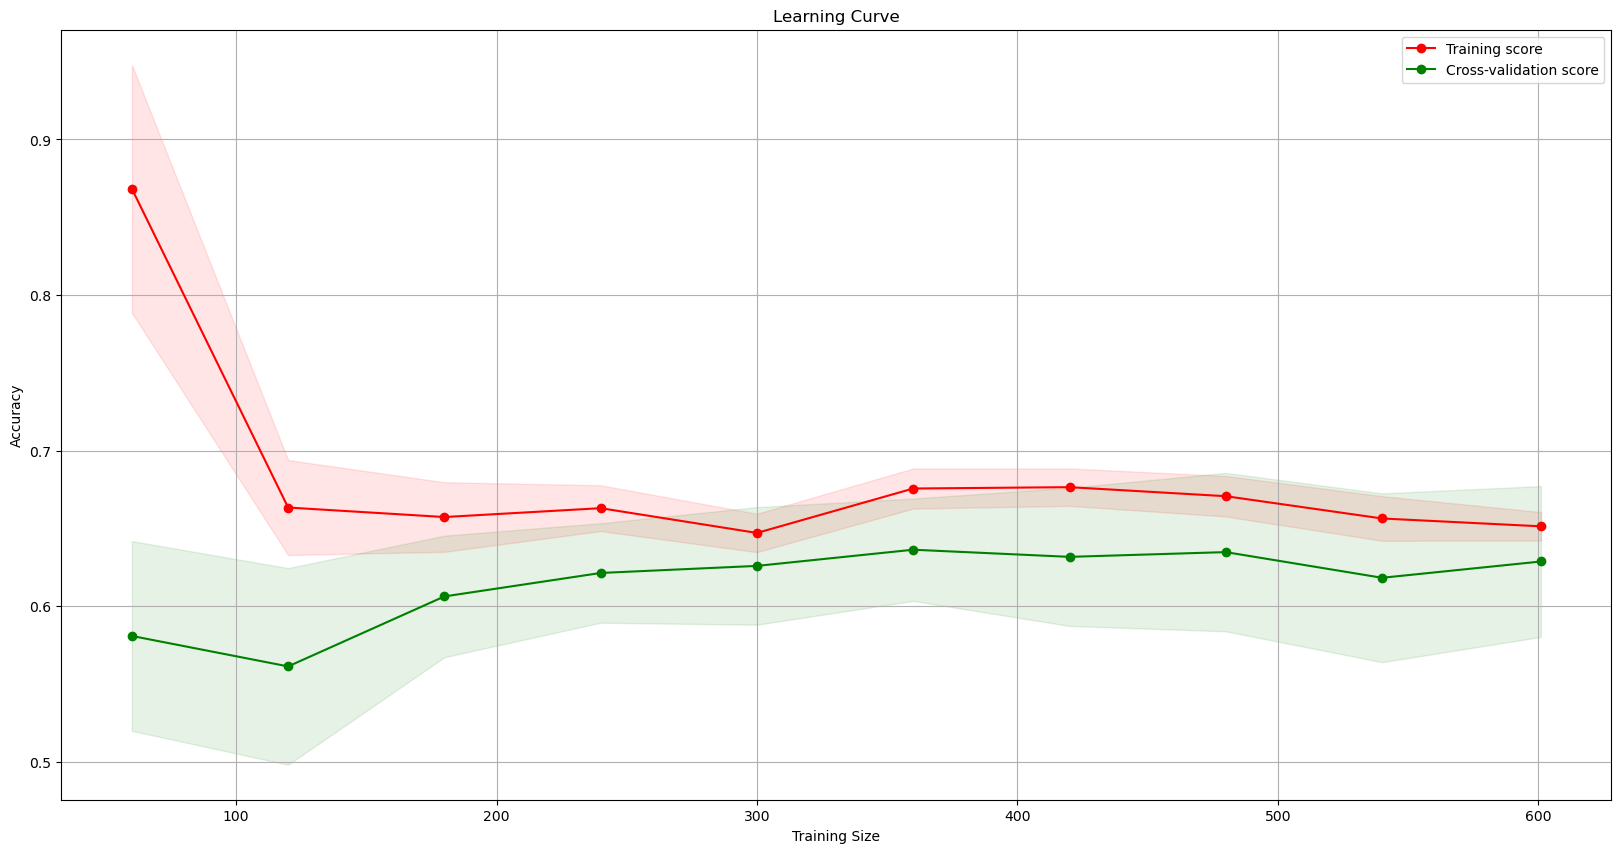

In [42]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(20, 10))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)  # Add grid for better readability
plt.show()


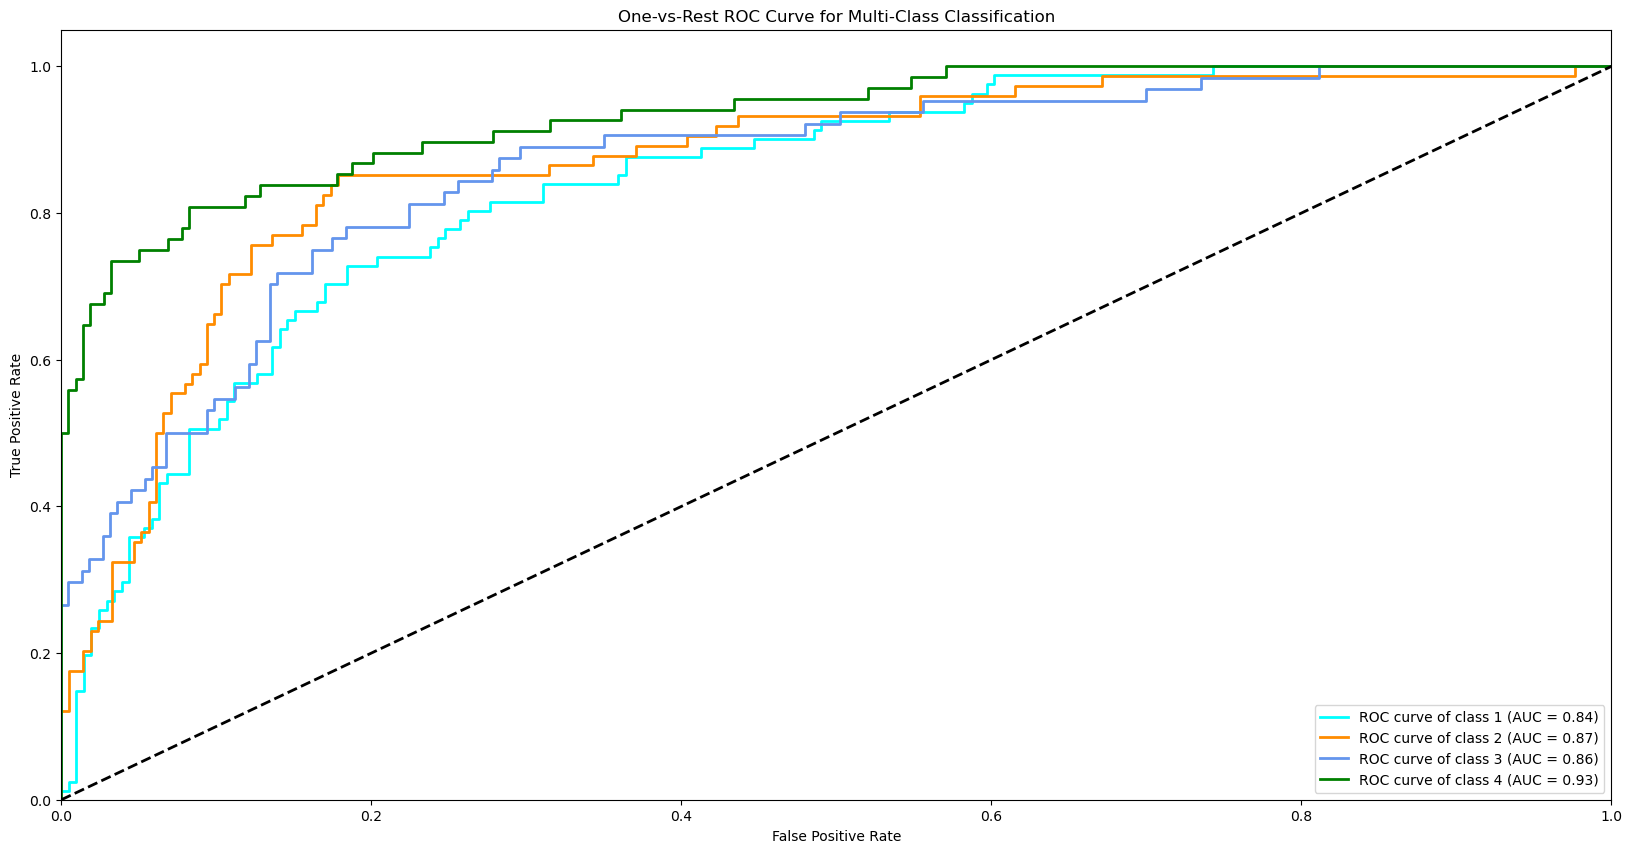

In [33]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# rf_model.fit(X_train, y_train)

y_score = model.predict_proba(X_test)

# Binarize the test labels
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i+1} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Add a diagonal line representing a random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

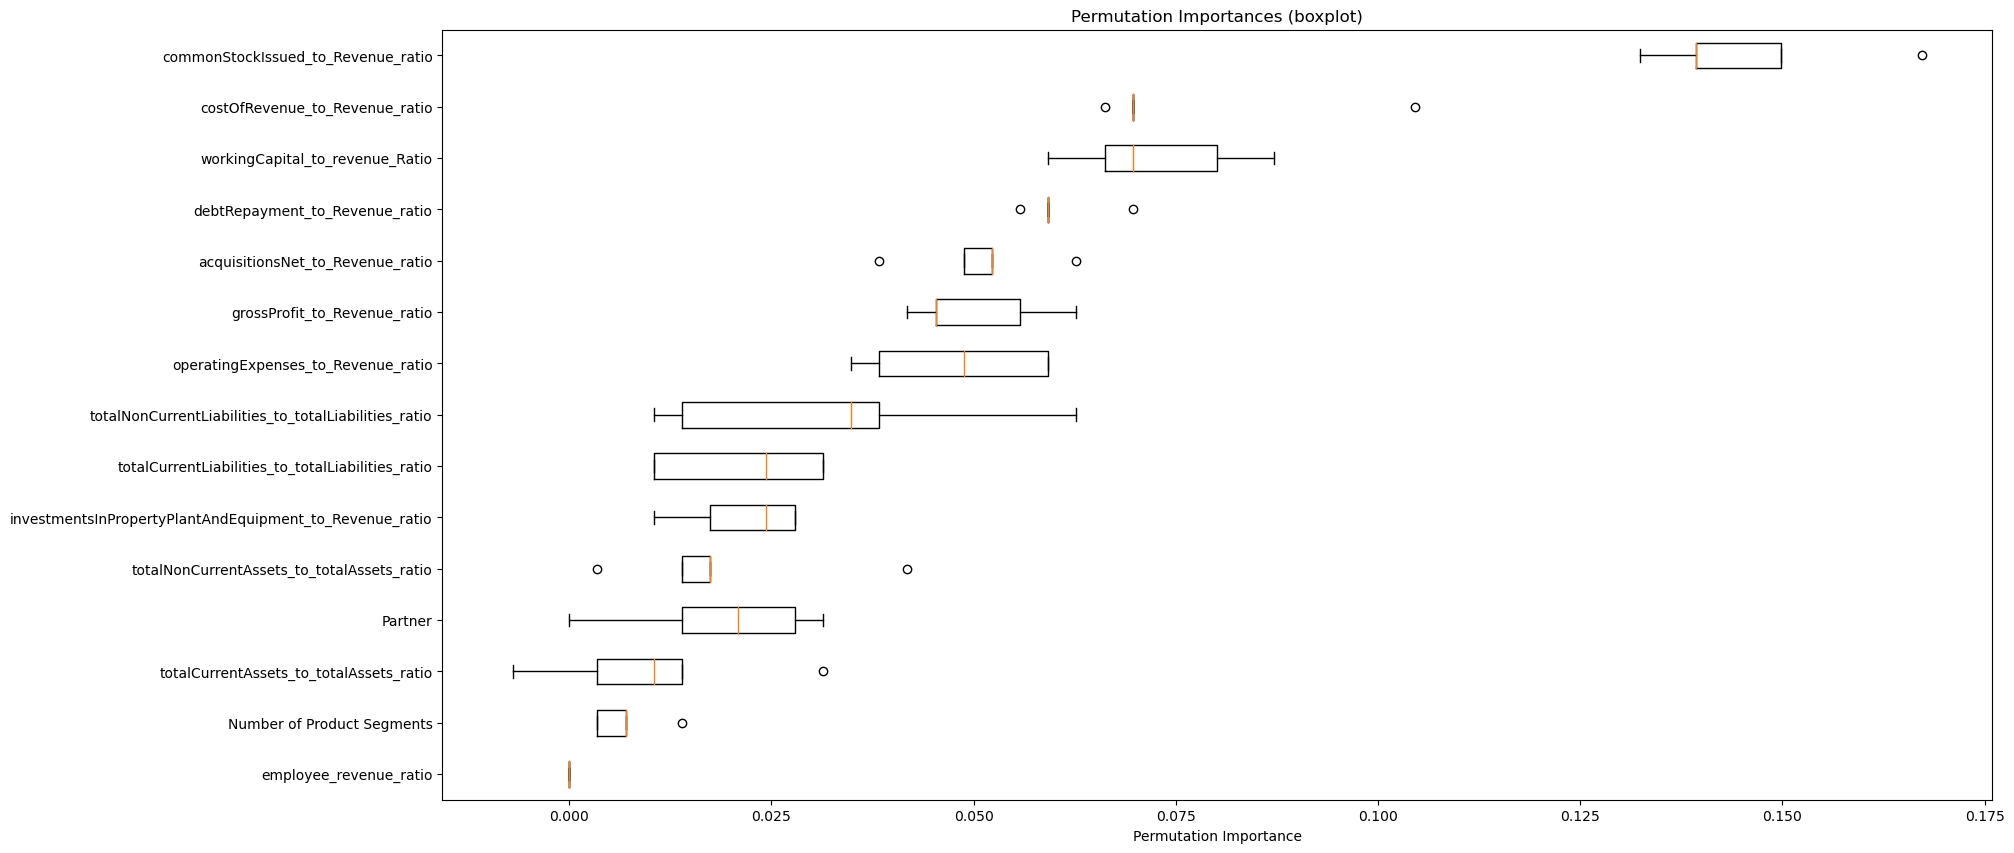

In [43]:
from sklearn.inspection import permutation_importance
plt.rcParams["figure.figsize"] = (20, 10)
classifier = model

perm_imp = permutation_importance(classifier, X_test, y_test, scoring="accuracy", random_state=123)
sorted_idx = perm_imp.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(perm_imp.importances[sorted_idx].T, vert=False, labels=X_scaled_df.columns[sorted_idx])
ax.set_title("Permutation Importances (boxplot)")
ax.set_xlabel("Permutation Importance")
plt.show()